# Pets Race app

In [4]:
!pip install -q timm
import timm
from fastai.vision.all import*
import gradio as gr

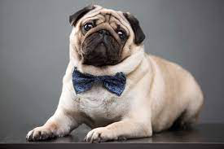

In [10]:
im = PILImage.create('pug.jpg')
im.thumbnail((224,224))
im

In [11]:
learn = load_learner('model.pkl')

In [12]:
learn.predict(im)

('pug',
 tensor(29),
 tensor([7.4893e-10, 2.4579e-09, 1.7050e-09, 1.1515e-09, 2.5674e-08, 2.1202e-08,
         1.0482e-10, 1.1486e-07, 2.1919e-10, 3.2888e-09, 4.2957e-07, 1.0284e-08,
         1.8910e-06, 8.2634e-09, 7.4615e-10, 2.0178e-09, 3.1007e-08, 3.7627e-09,
         8.7554e-11, 3.6334e-10, 2.5080e-10, 7.1088e-09, 7.5717e-09, 3.1177e-07,
         8.9511e-10, 9.9184e-10, 2.1995e-09, 4.3895e-10, 5.9020e-10, 1.0000e+00,
         5.8356e-09, 3.0020e-09, 2.2341e-09, 1.1404e-08, 1.4125e-08, 1.6799e-09,
         8.8254e-09]))

In [13]:
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [14]:
classify_image(im)

{'Abyssinian': 7.489283082584564e-10,
 'Bengal': 2.457857695148391e-09,
 'Birman': 1.7050301170939974e-09,
 'Bombay': 1.1515354225721808e-09,
 'British_Shorthair': 2.5673580594798295e-08,
 'Egyptian_Mau': 2.1202257727281903e-08,
 'Maine_Coon': 1.048196460184947e-10,
 'Persian': 1.148615780266482e-07,
 'Ragdoll': 2.191937326090354e-10,
 'Russian_Blue': 3.2887952361448924e-09,
 'Siamese': 4.295739017834421e-07,
 'Sphynx': 1.0284274765126611e-08,
 'american_bulldog': 1.8909599930339027e-06,
 'american_pit_bull_terrier': 8.263426387600248e-09,
 'basset_hound': 7.461508078066004e-10,
 'beagle': 2.017845224244752e-09,
 'boxer': 3.100731760241615e-08,
 'chihuahua': 3.762719469335707e-09,
 'english_cocker_spaniel': 8.755436653462567e-11,
 'english_setter': 3.6334119046799174e-10,
 'german_shorthaired': 2.5080165722002334e-10,
 'great_pyrenees': 7.108833077751342e-09,
 'havanese': 7.57174589693932e-09,
 'japanese_chin': 3.1176969628177176e-07,
 'keeshond': 8.951094865317089e-10,
 'leonberger': 

In [15]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['pug.jpg']

C:\Users\nebia\anaconda3\lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\nebia\anaconda3\lib\site-packages\gradio\inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\nebia\anaconda3\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\nebia\anaconda3\lib\site-packages\gradio\outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


In [16]:
intf = gr.Interface(fn = classify_image, inputs = image, outputs = label, examples = examples)
intf.launch(inline = False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [17]:
m = learn.model
m

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [18]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

AttributeError: Sequential has no attribute `model`

In [ ]:
l = m.get_submodule('0.model.stages.0.blocks.1.mlp.fc1')
list(l.parameters())